#### Andrew Taylor
#### EN685.621.82, SU23
#### August 21, 2023

# Programming Assignment 2

In [13]:
# Problem 1.1 FLDR ranking

# My implementation of PCA for homework 3 was technically correct,
# but resulted in different values due to the way python takes eigenvectors.
# So, for this problem I used the MNIST features provided with homework 3 in .csv format
# the 'trainFeatures42k1.xls' data set provided with PA2 seemed to have some error with my file so
# I used 'trainFeatures42k.csv'. which allowed me to work with them without loading a dependancy.

import pandas as pd
import numpy as np

def FLDR_rank_digits(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, 1:]  # Features (columns 2-61)
    y = data.iloc[:, 0]   # Labels (first column)

    all_features_with_ratios = []
    for digit in range(10):
        for column_idx, column in enumerate(X.columns):
            means = [X[y == d][column].mean() for d in range(10)]
            vars_ = [X[y == d][column].var() for d in range(10)]
            mean_digit = means[digit]
            means.pop(digit)
            mean_rest = sum(means) / 9
            var_digit = vars_[digit]
            vars_.pop(digit)
            var_rest = sum(vars_) / 9
            fld_ratio = ((mean_digit - mean_rest) ** 2) / (var_digit + var_rest)
            all_features_with_ratios.append((digit, column_idx + 2, fld_ratio))  # Include digit and column number

    print("Digit | Rank | Feature Column | FLDR")
    print("------------------------------------")
    ranked_features = sorted(all_features_with_ratios, key=lambda x: x[2], reverse=True)
    for rank, (digit, feature_column, fld_ratio) in enumerate(ranked_features, 1):
        print(f"{digit:5} | {rank:4} | {feature_column:14} | {fld_ratio}")
    # return 10 rows for unit testing
    return [feature_column for _, feature_column, _ in ranked_features[:10]]


def FLDR_rank_all(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, 1:]  # Features (columns 2-61)
    y = data.iloc[:, 0]   # Labels (first column)

    avg_fld_ratios = [0] * len(X.columns)
    for digit in range(10):
        for column_idx, column in enumerate(X.columns):
            means = [X[y == d][column].mean() for d in range(10)]
            vars_ = [X[y == d][column].var() for d in range(10)]
            mean_digit = means[digit]
            means.pop(digit)
            mean_rest = sum(means) / 9
            var_digit = vars_[digit]
            vars_.pop(digit)
            var_rest = sum(vars_) / 9
            fld_ratio = ((mean_digit - mean_rest) ** 2) / (var_digit + var_rest)
            avg_fld_ratios[column_idx] += fld_ratio / 10  # Accumulate and average

    print("\nGeneral ranking of features across all digits:")
    print("Rank | Feature Column | Avg FLDR")
    print("--------------------------------")
    ranked_features_general = sorted([(col + 2, avg_fld) for col, avg_fld in enumerate(avg_fld_ratios)], key=lambda x: x[1], reverse=True)
    for rank, (feature_column, avg_fld_ratio) in enumerate(ranked_features_general, 1):
        print(f"{rank:4} | {feature_column:14} | {avg_fld_ratio}")
    # return 10 rows for unit testing
    return [feature_column for feature_column, _ in ranked_features_general[:10]]

file_path = 'trainFeatures42k.csv'
FLDR_rank_digits(file_path)
FLDR_rank_all(file_path)


Digit | Rank | Feature Column | FLDR
------------------------------------
    1 |    1 |             22 | 4.1528929018214065
    6 |    2 |             43 | 3.738715330370773
    0 |    3 |             22 | 3.2154441017892714
    3 |    4 |              4 | 2.181119070130337
    2 |    5 |             43 | 2.001388139621966
    4 |    6 |             42 | 1.9358709280119293
    7 |    7 |             42 | 1.7228889502124787
    0 |    8 |              2 | 1.6131055780627948
    3 |    9 |             42 | 1.586801462450476
    0 |   10 |             44 | 1.3977399161907813
    9 |   11 |             42 | 1.3972980037869698
    4 |   12 |             44 | 1.206324877774881
    1 |   13 |             23 | 1.2055190804004003
    7 |   14 |             43 | 1.1670706076706672
    6 |   15 |              4 | 1.125933049437555
    7 |   16 |              5 | 1.066189240745426
    0 |   17 |              6 | 1.059513278833651
    7 |   18 |             46 | 0.9576041438271539
    2 |   19 |  


General ranking of features across all digits:
Rank | Feature Column | Avg FLDR
--------------------------------
   1 |             43 | 0.8790462300367095
   2 |             42 | 0.8235033888664344
   3 |             22 | 0.7970784277307003
   4 |              4 | 0.4564212504905896
   5 |             44 | 0.3947266392194985
   6 |              2 | 0.38559007418650676
   7 |             23 | 0.3106100577102724
   8 |             24 | 0.27271988663458346
   9 |              6 | 0.26916166682609327
  10 |              8 | 0.2662730538945967
  11 |             46 | 0.23871201531917663
  12 |              5 | 0.17846845033693157
  13 |             48 | 0.13750975644383992
  14 |             45 | 0.1349682021245667
  15 |             13 | 0.12634988874371314
  16 |             53 | 0.12518322571012447
  17 |              9 | 0.1130664572726956
  18 |             47 | 0.10433252559289663
  19 |             25 | 0.10171962852536137
  20 |              7 | 0.08504617973977899
  21 |         

[43, 42, 22, 4, 44, 2, 23, 24, 6, 8]

Looking at the above table we can see that the features performed differently depending on the digit, so it made more sense to rank them this way. The table is sorted by rank, showing the column number of the feature and the FLDR ratio. Better separation comes first; the features are ranked in descending order according to FLDR ratio. After the digit by digit breakdown, is a table showing the best overall features according to FLDR.

In [14]:
# Problem 1.2a Decision Tree built-in

from sklearn.tree import DecisionTreeClassifier
import pandas as pd

def fit_decision_tree(file_path):
    # Load the data
    data = pd.read_csv(file_path)

    # Split features and labels
    X = data.iloc[:, 1:]  # Features (columns 2-61)
    y = data.iloc[:, 0]   # Labels (first column)

    # Create and fit the Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X, y)

    # Get feature importances
    feature_importances = clf.feature_importances_

    # Rank and display the features
    print("Ranking of features using Decision Tree Classifier:")
    print("Rank | Feature Column | Importance")
    print("----------------------------------")
    ranked_features = sorted([(col + 2, importance) for col, importance in enumerate(feature_importances)], key=lambda x: x[1], reverse=True)
    for rank, (feature_column, importance) in enumerate(ranked_features, 1):
        print(f"{rank:4} | {feature_column:14} | {importance}")

    return clf

# File path to the dataset
file_path = 'trainFeatures42k.csv'

# Fit the Decision Tree Classifier and get feature importances
clf = fit_decision_tree(file_path)


Ranking of features using Decision Tree Classifier:
Rank | Feature Column | Importance
----------------------------------
   1 |             22 | 0.14106341221518656
   2 |             42 | 0.10847230842622664
   3 |             44 | 0.10510543728736564
   4 |             43 | 0.09550284300748513
   5 |              2 | 0.06684708370760925
   6 |              4 | 0.061414367553516695
   7 |             45 | 0.05127662762309186
   8 |              5 | 0.030618365119731886
   9 |              3 | 0.025561045433022688
  10 |             50 | 0.02391299257926771
  11 |             48 | 0.02265853092367698
  12 |             46 | 0.022418928797889218
  13 |             24 | 0.016086097992630045
  14 |             51 | 0.011536459962195236
  15 |             53 | 0.009735178522291511
  16 |             47 | 0.008353468037990202
  17 |             23 | 0.008325104657525716
  18 |             52 | 0.008247888523638901
  19 |              6 | 0.008145119223605382
  20 |              8 | 0.00779

In [15]:
# Problem 1.2b 5-fold cross-valdation and model scoring

from sklearn.model_selection import cross_val_score
import pandas as pd

def fit_decision_tree(file_path):
    # Load the data
    data = pd.read_csv(file_path)

    # Split features and labels
    X = data.iloc[:, 1:]  # Features (columns 2-61)
    y = data.iloc[:, 0]   # Labels (first column)

    # Create the Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42)

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

    # Print the cross-validation scores
    print("5-Fold Cross-Validation Scores:")
    for fold, score in enumerate(cv_scores, 1):
        print(f"Fold {fold}: {score * 100:.2f}%")

    # Print the average accuracy
    print(f"\nAverage Accuracy: {cv_scores.mean() * 100:.2f}%")

    return cv_scores.mean()

# File path to the dataset
file_path = 'trainFeatures42k.csv'

# Perform 5-fold cross-validation and get the average accuracy
average_accuracy = fit_decision_tree(file_path)


5-Fold Cross-Validation Scores:
Fold 1: 84.81%
Fold 2: 84.89%
Fold 3: 85.12%
Fold 4: 84.55%
Fold 5: 84.68%

Average Accuracy: 84.81%


In [62]:
# Problem 1.2c Feature Importance of Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

def rank_features_decision_tree(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, 1:]  # Features (columns 2-61)
    y = data.iloc[:, 0]   # Labels (first column)

    # Create and fit the Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X, y)

    # Get feature importances
    feature_importances = clf.feature_importances_

    # Rank the features
    ranked_features = sorted([(col + 2, importance) for col, importance in enumerate(feature_importances)], key=lambda x: x[1], reverse=True)
    

    # Rank and display the features
    print("Ranking of features using Decision Tree Classifier:")
    print("Rank | Feature Column | Importance")
    print("----------------------------------")
    ranked_features = sorted([(col + 2, importance) for col, importance in enumerate(feature_importances)], key=lambda x: x[1], reverse=True)
    for rank, (feature_column, importance) in enumerate(ranked_features, 1):
        print(f"{rank:4} | {feature_column:14} | {importance}")
    # return 10 rows for unit testing        
    return [feature_column for feature_column, _ in ranked_features[:10]]

# Runs in the next cell

In [17]:
# Problem 1.2d Unit testing for feature ranking of both methods

# these functions will test according to the known results of the first 10 features ranked

def test_FLDR_rank_digits():
    file_path = 'trainFeatures42k.csv'
    expected_ranking = [22, 43, 22, 4, 43, 42, 42, 2, 42, 44]
    ranked_features = FLDR_rank_digits(file_path)
    assert ranked_features == expected_ranking, f"Expected {expected_ranking}, but got {ranked_features}"

def test_FLDR_rank_all():
    file_path = 'trainFeatures42k.csv'
    expected_ranking = [43, 42, 22, 4, 44, 2, 23, 24, 6, 8]
    ranked_features = FLDR_rank_all(file_path)
    assert ranked_features == expected_ranking, f"Expected {expected_ranking}, but got {ranked_features}"

def test_rank_features_decision_tree():
    file_path = 'trainFeatures42k.csv'
    expected_ranking = [22, 42, 44, 43, 2, 4, 45, 5, 3, 50]
    ranked_features = rank_features_decision_tree(file_path)
    assert ranked_features == expected_ranking, f"Expected {expected_ranking}, but got {ranked_features}"

def run_tests():
    test_rank_features_decision_tree()
    test_FLDR_rank_digits()
    test_FLDR_rank_all()
    print("All functions passed!")

run_tests()


Ranking of features using Decision Tree Classifier:
Rank | Feature Column | Importance
----------------------------------
   1 |             22 | 0.14106341221518656
   2 |             42 | 0.10847230842622664
   3 |             44 | 0.10510543728736564
   4 |             43 | 0.09550284300748513
   5 |              2 | 0.06684708370760925
   6 |              4 | 0.061414367553516695
   7 |             45 | 0.05127662762309186
   8 |              5 | 0.030618365119731886
   9 |              3 | 0.025561045433022688
  10 |             50 | 0.02391299257926771
  11 |             48 | 0.02265853092367698
  12 |             46 | 0.022418928797889218
  13 |             24 | 0.016086097992630045
  14 |             51 | 0.011536459962195236
  15 |             53 | 0.009735178522291511
  16 |             47 | 0.008353468037990202
  17 |             23 | 0.008325104657525716
  18 |             52 | 0.008247888523638901
  19 |              6 | 0.008145119223605382
  20 |              8 | 0.00779


General ranking of features across all digits:
Rank | Feature Column | Avg FLDR
--------------------------------
   1 |             43 | 0.8790462300367095
   2 |             42 | 0.8235033888664344
   3 |             22 | 0.7970784277307003
   4 |              4 | 0.4564212504905896
   5 |             44 | 0.3947266392194985
   6 |              2 | 0.38559007418650676
   7 |             23 | 0.3106100577102724
   8 |             24 | 0.27271988663458346
   9 |              6 | 0.26916166682609327
  10 |              8 | 0.2662730538945967
  11 |             46 | 0.23871201531917663
  12 |              5 | 0.17846845033693157
  13 |             48 | 0.13750975644383992
  14 |             45 | 0.1349682021245667
  15 |             13 | 0.12634988874371314
  16 |             53 | 0.12518322571012447
  17 |              9 | 0.1130664572726956
  18 |             47 | 0.10433252559289663
  19 |             25 | 0.10171962852536137
  20 |              7 | 0.08504617973977899
  21 |         

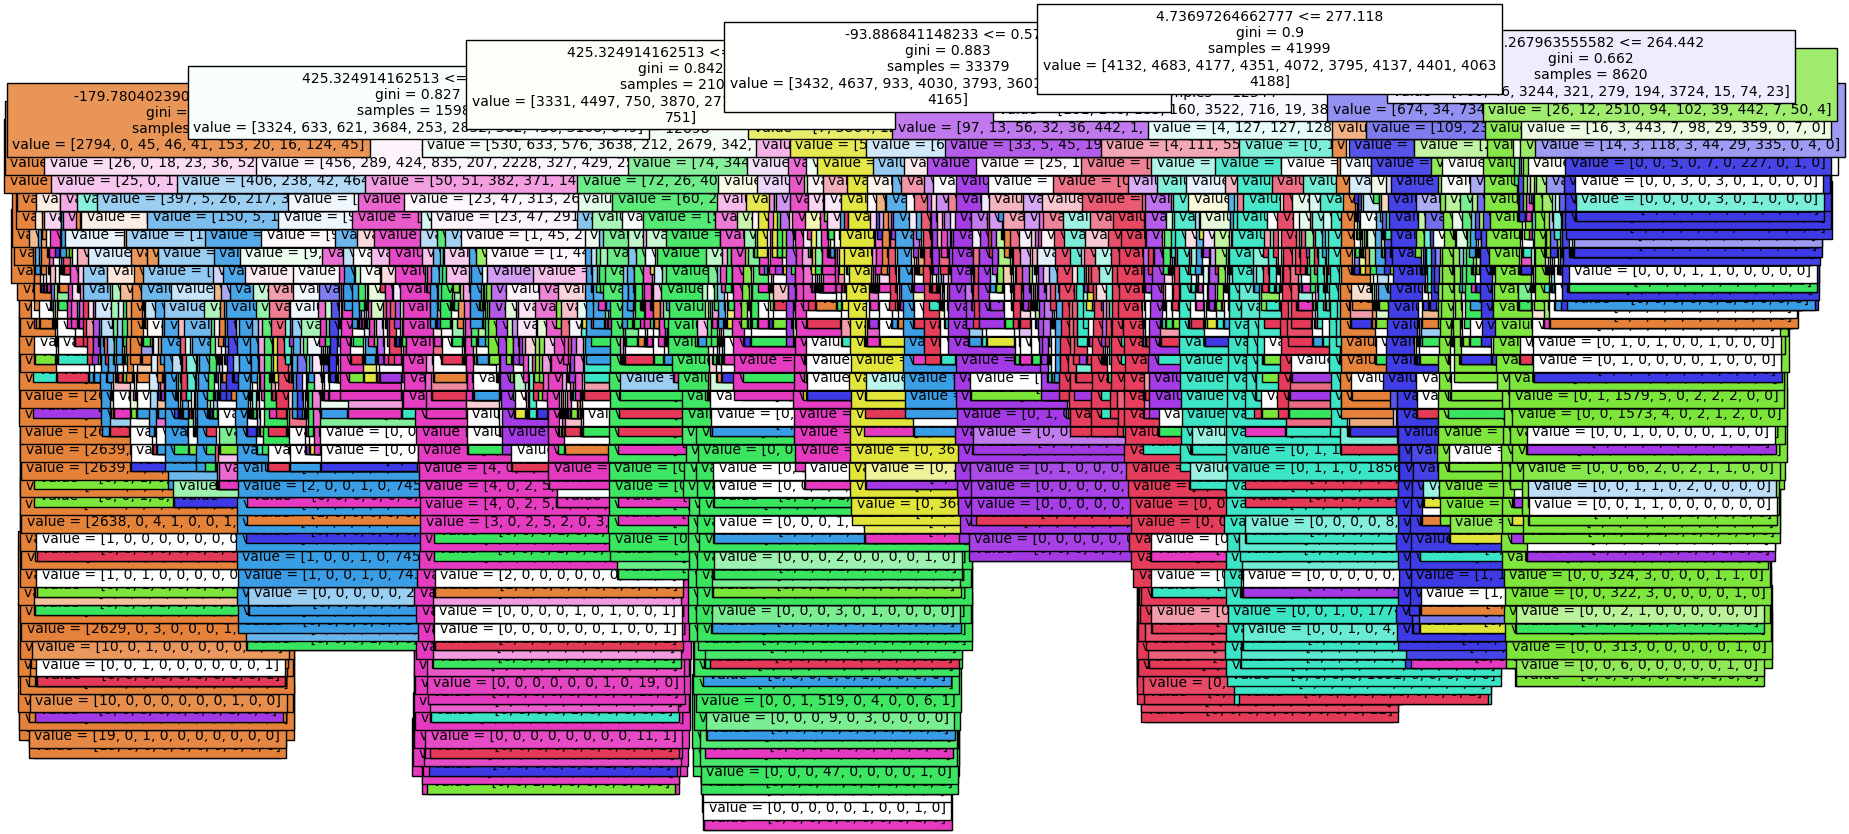

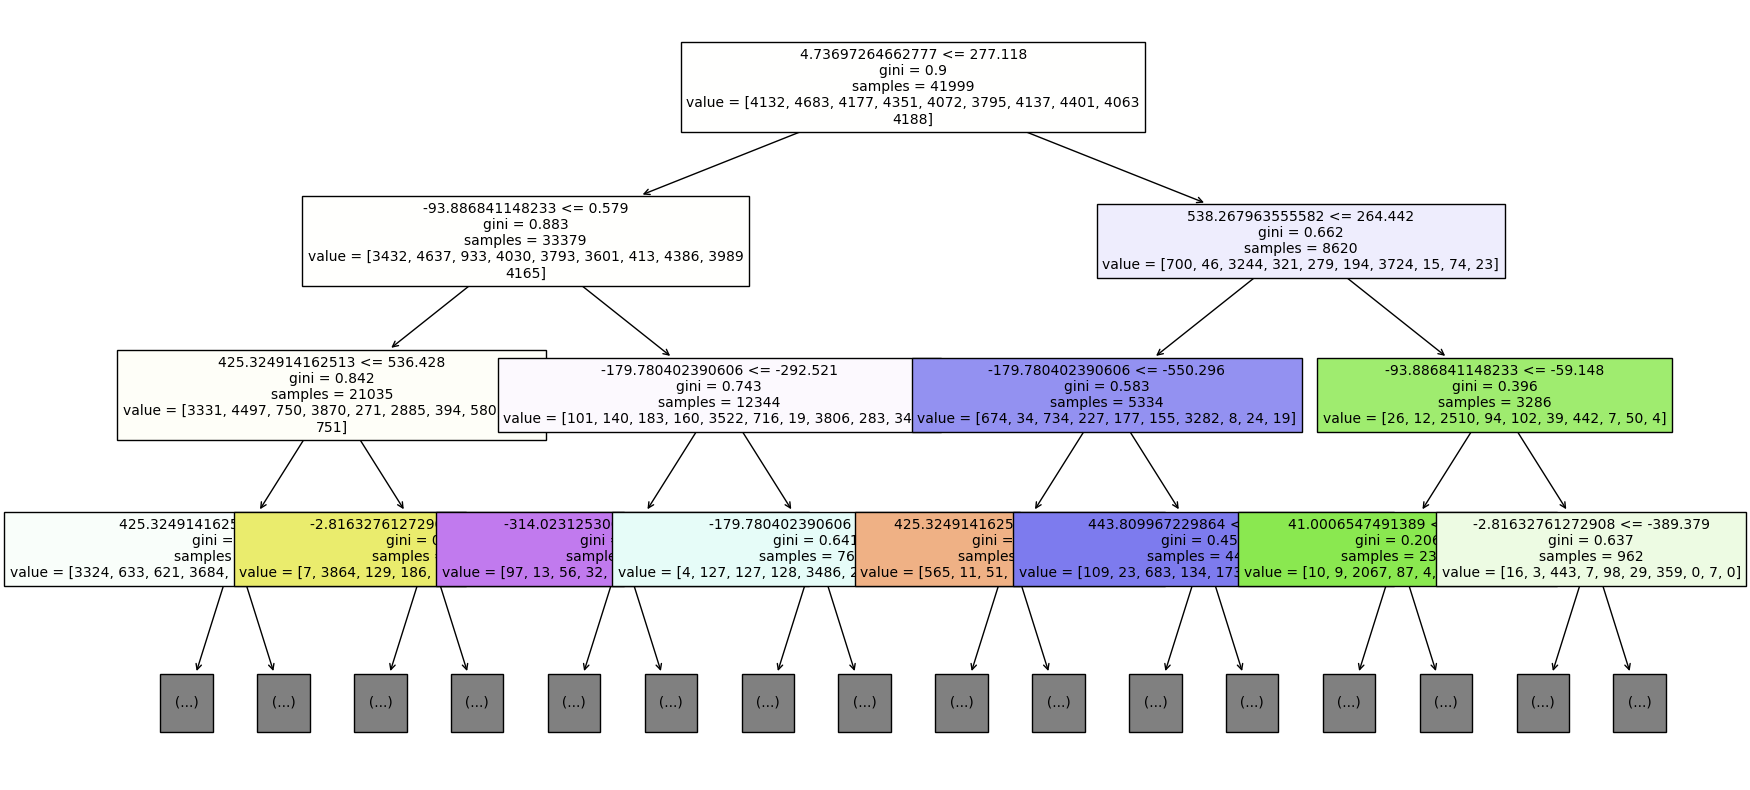

In [19]:
# Problem 1.2e Decision Tree Graph

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

file_path = 'trainFeatures42k.csv'
data = pd.read_csv(file_path)
X = data.iloc[:, 1:]  # Features (columns 2-61)
y = data.iloc[:, 0]   # Labels (first column)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(clf, fontsize=10, feature_names=X.columns, filled=True)
plt.show()

print('\n')

plt.figure(figsize=(20, 10))
plot_tree(clf, max_depth=3, fontsize=10, feature_names=X.columns, filled=True)
plt.show()


## Problem 1.2e - Decision Tree Graph Analysis

The Decision Tree is a versatile machine learning model that makes predictions by traversing a tree-like graph of decisions. Starting at the root node, the tree evaluates the features of a given input and moves down the branches according to specific decision rules. Each internal node in the tree corresponds to a decision based on a feature value, and each leaf node represents a predicted class label.

In the context of training the Decision Tree, the algorithm typically uses metrics to determine the best decision rules. The goal is to find the feature and threshold that best separate the classes. By doing this recursively, the tree is able to divide the feature space into homogeneous regions that correspond to specific class labels.

The Decision Tree's prediction method is straightforward, consisting of a traversal from the root node to a leaf node. This traversal follows the decision rules that match the features of the given input. Once a leaf node is reached, the predicted class label associated with that leaf is returned as the output.

Analyzing the runtime complexity of the Decision Tree reveals that the training complexity is generally  
$$O(n \cdot m \cdot \log(m))$$  

where 'n' is the number of features and m is the number of samples. This complexity arises from the need to sort the samples at each node to find the optimal split. The prediction complexity, on the other hand, is proportional to the depth of the tree, which is typically much less than 'm' for a well-balanced tree. The space complexity of the tree is related to the number of nodes, which can be as high as 'O(m)' but is usually less in practice.

One of the key advantages of Decision Trees is their interpretability. By visualizing the tree, we can gain insights into the decision-making process and understand how different features contribute to the predictions. However, Decision Trees can also be prone to overfitting when the tree is deep.

In conclusion, the Decision Tree's hierarchical structure and decision-making process offer a clear and logical way to understand the relationships between the features and the target variable. The visualized tree graph above and the analysis of its key parameters provide a valuable perspective into the model's behavior and complexity. It took quite a while to generate the whole tree and it's impossible to read! Thus, I also displayed it with a max depth of 3.


## Problem 1.2f - Comparison of Decision Tree and FLDR approaches

### Decision Tree Classifier

#### Methodology:
The Decision Tree Classifier employs a recursive binary partitioning algorithm that prioritizes features based on their information gain or Gini impurity reduction. This approach quantifies the reduction in entropy or impurity achieved by partitioning the dataset based on a particular feature. In the Scikit-learn implementation of the DecisionTreeClassifier, this default is the Gini impurity.

### Gini Impurity

Gini impurity is a metric that quantifies how often a randomly selected sample from a set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the set. Mathematically, the Gini impurity is calculated as:

$$
\text{Gini}(t) = 1 - \sum_{i=1}^{c} p_i^2
$$

where \( p_i \) represents the probability of class \( i \) at node \( t \), and \( c \) is the total number of classes.

#### Benefits:
- **Modeling of Non-Linear Boundaries**: It inherently models complex non-linear decision boundaries, capturing intricate relationships between predictors and response variables.
- **Transparency and Interpretability**: The decision-making process, governed by a sequence of binary decisions, can be elucidated through a tree diagram, enhancing model transparency.
- **Capability to Handle Heterogeneous Data**: It seamlessly integrates continuous and categorical predictors without necessitating transformation or normalization.

### Fischer's Linear Discriminant Ratio (FLDR)

#### Methodology:
FLDR operates on the principle of linear discriminant analysis, maximizing the ratio of the between-class scatter to the within-class scatter for a given feature. It leverages the mean and variance of each feature across different classes to derive a linear combination that optimally separates the classes.

#### Benefits:
- **Assumption of Linearity**: It intrinsically assumes that the underlying relationship between predictors and response variables is linear, making it an optimal choice for linearly separable data.
- **Facilitation of Dimensionality Reduction**: It can be utilized as a dimensionality reduction technique, yielding a parsimonious representation without sacrificing discriminative power.
- **Algorithmic Simplicity**: Its mathematical formulation is unambiguous and computationally efficient, devoid of hyperparameter tuning or iterative optimization.

### Comparison and Discussion:

- **Underlying Assumptions and Flexibility**: While Decision Trees are non-parametric and agnostic to data distribution, FLDR's efficacy relies on the assumption of multivariate normality and homoscedasticity, constraining its applicability to linearly separable phenomena.
- **Model Complexity and Overfitting Sensitivity**: Decision Trees, particularly deep ones, are susceptible to overfitting and require prudent pruning or regularization, whereas FLDR's linear formulation inherently mitigates overfitting risks.
- **Criterion for Feature Ranking**: Decision Trees assess feature importance through localized entropy reduction or Gini impurity minimization, whereas FLDR's criterion is predicated on global linear separability.
- **Computational Considerations**: Decision Trees necessitate computationally intensive sorting and threshold optimization, whereas FLDR's closed-form solution ensures computational economy.

### Conclusion:
The Decision Tree Classifier and FLDR epitomize distinct paradigms in feature ranking, reflecting different assumptions, complexities, and computational considerations. Decision Trees excel in deciphering non-linear interactions and heterogeneous data, while FLDR's linear formulation and computational efficiency render it suitable for linearly separable scenarios.

A similarity of feature importances from these disparate methodologies furnishes a multifaceted perspective on feature significance, corroborating the robustness of feature selection and underscoring the generalizability of the resultant models. Looking at the data, a comparative analysis shows the congruence and divergence in feature ranking, facilitating informed decision-making in subsequent modeling endeavors.

## Problem 2.1 Data Preprocessing

Step 1: Normalize Features  
I'll apply Min-Max scaling to normalize all 60 features to the range [0, 1].  

Step 2: Remove Outliers Using Wilk's Method  

1. Compute the mean and covariance matrix for the data.    
2. Calculate the Mahalanobis distance for each observation. The Mahalanobis distance gives a measure of how far each observation is from the mean, taking into account the correlations between variables.
3. Sort the observations by their Mahalanobis distance, and remove the top k observations.  

Step 3: Rank Features  
Here I chose to calculate and rank according to the Battacharyya distance between the distribution of different classes. This will measure the separability between classes for each feature. Then I will rank them.

As suggested by Dr. Rodriguez, I focused only on the first 100 observations for the digits 0,1 and 2.

In [46]:
# Problem 2.1 Data Preprocessing

import numpy as np
import pandas as pd
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report

# Suppress RuntimeWarnings (they were cluttering my output)
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Read the data without headers
file_path = 'trainFeatures42k.csv'
data = pd.read_csv(file_path, header=None)

# Filter the data for the first 100 observations of digits 0, 1, and 2 (Dr. R said this is enough)
data = pd.concat([data[data[0] == digit].iloc[:100] for digit in [0, 1, 2]])

# Separate features and labels
y = data.iloc[:, 0]
X = data.iloc[:, 1:61]  # Select the first 60 features

# Normalize the features using Pandas
X = (X - X.min()) / (X.max() - X.min())

# Concatenate X and y for outlier removal
data = pd.concat([y, X], axis=1)

# Compute mean and covariance matrix for features
mean_vector = X.mean()
cov_matrix = X.cov()

# Compute the inverse of the covariance matrix
inv_cov_matrix = inv(cov_matrix)

# Calculate Mahalanobis distance
mahalanobis_distance = X.apply(lambda row: (row - mean_vector).T.dot(inv_cov_matrix).dot(row - mean_vector), axis=1)

# Sort by Mahalanobis distance
data['mahalanobis_distance'] = mahalanobis_distance
data = data.sort_values(by='mahalanobis_distance', ascending=False)

# Remove top k observations (here I chose 50)
k = 50
data = data.iloc[k:].drop(columns=['mahalanobis_distance'])

# Separate features and labels again after outlier removal
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

def bhattacharyya_distance(feature_values, labels):
    distances = []
    for class1 in np.unique(labels):
        mean1 = np.mean(feature_values[labels == class1])
        var1 = np.var(feature_values[labels == class1])

        for class2 in np.unique(labels):
            if class1 != class2:
                mean2 = np.mean(feature_values[labels == class2])
                var2 = np.var(feature_values[labels == class2])

                distance = 0.25 * np.log(0.25 * ((var1/var2) + (var2/var1) + 2)) + 0.25 * ((mean1 - mean2)**2) / (var1 + var2)
                distances.append(distance)

    return np.mean(distances)

# Calculate Bhattacharyya distance for each feature and store in a list
feature_distances = [bhattacharyya_distance(X.iloc[:, i], y) for i in range(X.shape[1])]

# Sort features by Bhattacharyya distance in descending order
ranked_feature_indices = sorted(range(len(X.columns)), key=lambda i: feature_distances[i], reverse=True)

# Reorder the features in the DataFrame according to the ranking
X_ranked = X.iloc[:, ranked_feature_indices]

# Concatenate with labels to create the final ranked DataFrame
data_ranked = pd.concat([y, X_ranked], axis=1)

# Print the data
print(data_ranked)

# Select the top 7 features from the ranked features
X_top_features = X_ranked.iloc[:, :7]

# Concatenate with labels to create the final DataFrame with top 7 features
data_top_features = pd.concat([y, X_top_features], axis=1)

# Print the data with top 7 features
print(data_top_features)




      0         21        1         42        43        44        41  \
444    2  0.323004  0.829224  0.620578  0.516261  0.392768  0.266810   
353    2  0.270464  0.499926  0.908678  0.714751  0.739093  0.480473   
279    0  0.236130  0.127475  0.687812  0.480889  0.717897  0.441990   
324    2  0.406742  0.802403  0.636019  0.718890  0.868715  0.183102   
896    0  0.344323  0.404486  0.479677  0.556798  0.804359  0.406221   
...   ..       ...       ...       ...       ...       ...       ...   
41     1  0.892468  0.425688  0.402815  0.669427  0.820324  0.504926   
945    1  0.841868  0.388574  0.377215  0.732783  0.807768  0.538135   
527    1  0.814869  0.429318  0.404612  0.743267  0.820425  0.593188   
590    1  0.755025  0.444970  0.355248  0.696644  0.850821  0.559137   
1000   1  0.797756  0.407697  0.362753  0.714709  0.859851  0.560761   

            47        12        5   ...        33        37        39  \
444   0.796636  0.685668  0.412203  ...  0.384683  0.711924  0

(300 observations with the top 16.66% outliers removed, then also with only 7 features)

In [47]:
# Problem 2.2 Machine Learning Techniques

from sklearn.model_selection import train_test_split
import scipy
import scipy.stats
import warnings
import numpy as np


# Use the top 7 features for classification
X_top_features = X_ranked.iloc[:, :7]
y = data.iloc[:, 0]

# Split the data into training and test sets for one fold
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)


# Implementing Bayes Classifier
def bayes_classifier(X_train, y_train, X_test):
    class_means = {}
    class_covs = {}
    priors = {}
    epsilon = 1e-3  # Regularization term

    # Calculate means, covariances, and priors for each class
    for class_label in np.unique(y_train):
        X_class = X_train[y_train == class_label]
        class_means[class_label] = X_class.mean()
        class_covs[class_label] = X_class.cov() + epsilon * np.eye(X_class.shape[1]) # Add regularization
        priors[class_label] = len(X_class) / len(X_train)

    # Classify test data
    predictions = []
    for _, row in X_test.iterrows():
        posteriors = {}
        for class_label in class_means.keys():
            mean = class_means[class_label]
            cov = class_covs[class_label]
            prior = priors[class_label]
            likelihood = scipy.stats.multivariate_normal.pdf(row, mean, cov)
            posteriors[class_label] = likelihood * prior
        predictions.append(max(posteriors, key=posteriors.get))

    # Return predictions
    return pd.Series(predictions)


# Get predictions
y_pred_bayes = bayes_classifier(X_train, y_train, X_test)

# Print the head of the results
print('\n')
print('Bayesian Classifier Class Predictions:')
print(y_pred_bayes.head())
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Implementing Parzen Window
def parzen_window(X_train, y_train, X_test, h=1):
    def gaussian_kernel(x, mean, h):
        return (1 / (np.sqrt(2 * np.pi) * h)) * np.exp(-0.5 * ((x - mean) / h) ** 2)

    predictions = []
    for _, row in X_test.iterrows():
        densities = {}
        for class_label in np.unique(y_train):
            X_class = X_train[y_train == class_label]
            density = np.mean([gaussian_kernel(row, x, h) for _, x in X_class.iterrows()])
            densities[class_label] = density
        predictions.append(max(densities, key=densities.get))

    # Return predictions
    return pd.Series(predictions)

# Get predictions
y_pred_parzen = parzen_window(X_train, y_train, X_test, h=1)

# Print the head of the results
print('\n')
print('Parzen Window Class Predictions:')
print(y_pred_parzen.head())


def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def smo(X, y, C=1.0, tol=1e-3, max_passes=5, epsilon=1e-5):
    m, n = X.shape
    alphas = np.zeros(m)
    b = 0
    passes = 0

    # Precompute the Kernel
    K = X @ X.T

    while passes < max_passes:
        num_changed_alphas = 0
        for i in range(m):
            E_i = np.dot((alphas * y), K[:, i]) + b - y[i]
            if (y[i] * E_i < -tol and alphas[i] < C) or (y[i] * E_i > tol and alphas[i] > 0):
                j = np.random.choice([x for x in range(m) if x != i])
                E_j = np.dot((alphas * y), K[:, j]) + b - y[j]
                alpha_i_old, alpha_j_old = alphas[i], alphas[j]

                L, H = (max(0, alphas[j] - alphas[i]), min(C, C + alphas[j] - alphas[i])) if y[i] != y[j] else (max(0, alphas[i] + alphas[j] - C), min(C, alphas[i] + alphas[j]))
                if L == H: continue

                eta = 2 * K[i, j] - K[i, i] - K[j, j] + epsilon
                if eta >= 0: continue

                alphas[j] -= y[j] * (E_i - E_j) / eta
                alphas[j] = np.clip(alphas[j], L, H)
                if abs(alphas[j] - alpha_j_old) < tol: continue

                alphas[i] += y[i] * y[j] * (alpha_j_old - alphas[j])

                b1 = b - E_i - y[i] * (alphas[i] - alpha_i_old) * K[i, i] - y[j] * (alphas[j] - alpha_j_old) * K[i, j]
                b2 = b - E_j - y[i] * (alphas[i] - alpha_i_old) * K[i, j] - y[j] * (alphas[j] - alpha_j_old) * K[j, j]
                # Clip the values to avoid overflow
                b1, b2 = np.clip([b1, b2], -np.inf, np.inf)

                b = b1 if 0 < alphas[i] < C else (b2 if 0 < alphas[j] < C else (b1 + b2) / 2)

                num_changed_alphas += 1

        passes = passes + 1 if num_changed_alphas == 0 else 0

    return alphas, b


# Train SVM
y_train_svm = y_train.replace({0: -1})
alphas, b = smo(X_train.values, y_train_svm.values)

def svm_predict(X, alphas, b, y_train_svm, X_train):
    predictions = []
    for i in range(len(X)):
        prediction = np.sum(alphas * y_train_svm * linear_kernel(X_train, X.iloc[i])) + b
        predictions.append(prediction)
    return predictions

def one_vs_one_svm(X_train, y_train, X_test):
    unique_classes = np.unique(y_train)
    class_pairs = [(i, j) for i in unique_classes for j in unique_classes if i < j]
    final_predictions = []
    for test_instance in X_test.iterrows():
        class_votes = {class_label: 0 for class_label in unique_classes}
        for class_pair in class_pairs:
            class1, class2 = class_pair
            # Filter training data for the specific pair of classes
            X_train_pair = X_train[(y_train == class1) | (y_train == class2)]
            y_train_pair = y_train[(y_train == class1) | (y_train == class2)]
            y_train_pair = y_train_pair.apply(lambda x: 1 if x == class1 else -1)
            alphas, b = smo(X_train_pair.values, y_train_pair.values)
            prediction = svm_predict(test_instance[1].to_frame().T, alphas, b, y_train_pair, X_train_pair)
            predicted_class = class1 if prediction[0] > 0 else class2
            class_votes[predicted_class] += 1
        final_predictions.append(max(class_votes, key=class_votes.get))
    return pd.Series(final_predictions)


# Get predictions using One-vs-One SVM
y_pred_svm = one_vs_one_svm(X_train, y_train, X_test)

# Print the head of the results
print('\n')
print('One-vs-One SVM Class Predictions:')
print(y_pred_svm.head())





Bayesian Classifier Class Predictions:
0    0
1    2
2    0
3    0
4    0
dtype: int64


Parzen Window Class Predictions:
0    0
1    2
2    0
3    0
4    0
dtype: int64


One-vs-One SVM Class Predictions:
0    0
1    2
2    0
3    0
4    0
dtype: int64


Now that we are getting results for one 20% fold, let's plot the results:

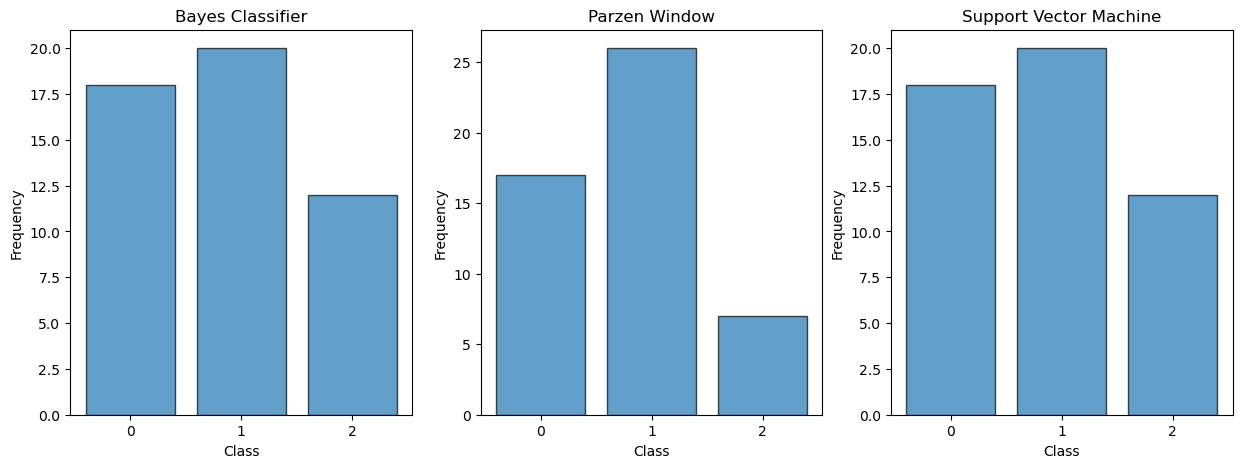

In [48]:
# Problem 2.2 - Plot Results of one fold as histograms

import matplotlib.pyplot as plt

plt.figure(figsize=[15,5])

plt.subplot(1, 3, 1)
plt.hist(y_pred_bayes, bins=np.arange(4) - 0.5, edgecolor='k', alpha=0.7, rwidth=0.8)
plt.title('Bayes Classifier')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2])

plt.subplot(1, 3, 2)
plt.hist(y_pred_parzen, bins=np.arange(4) - 0.5, edgecolor='k', alpha=0.7, rwidth=0.8)
plt.title('Parzen Window')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2])

plt.subplot(1, 3, 3)
plt.hist(y_pred_svm, bins=np.arange(4) - 0.5, edgecolor='k', alpha=0.7, rwidth=0.8)
plt.title('Support Vector Machine')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2])

plt.show()



In [59]:
# Problem 2.3 5-fold Cross Validation, classification report and accuracy

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report


def cross_validate(X_top_features, y, method_name, classifier_func):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []

    print(f"Classification Report for {method_name}:")
    for train_index, test_index in kf.split(X_top_features):
        X_train, X_test = X_top_features.iloc[train_index], X_top_features.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Get predictions using the provided classifier function
        y_pred = classifier_func(X_train, y_train, X_test)

        # Calculate and print accuracy and classification report
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(classification_report(y_test, y_pred))

    print(f"Average Accuracy for {method_name}: {np.mean(accuracies)}\n\n")

def svm_predict(X, alphas, b, y_train_svm, X_train):
    predictions = []
    for i in range(len(X)):
        prediction = np.sum(alphas * y_train_svm * linear_kernel(X_train, X.iloc[i])) + b
        predictions.append(prediction)
    return predictions

def one_vs_one_svm(X_train, y_train, X_test):
    unique_classes = np.unique(y_train)
    class_pairs = [(i, j) for i in unique_classes for j in unique_classes if i < j]
    final_predictions = []
    for test_instance in X_test.iterrows():
        class_votes = {class_label: 0 for class_label in unique_classes}
        for class_pair in class_pairs:
            class1, class2 = class_pair
            # Filter training data for the specific pair of classes
            X_train_pair = X_train[(y_train == class1) | (y_train == class2)]
            y_train_pair = y_train[(y_train == class1) | (y_train == class2)]
            y_train_pair = y_train_pair.apply(lambda x: 1 if x == class1 else -1)
            alphas, b = smo(X_train_pair.values, y_train_pair.values)
            prediction = svm_predict(test_instance[1].to_frame().T, alphas, b, y_train_pair, X_train_pair)
            predicted_class = class1 if prediction[0] > 0 else class2
            class_votes[predicted_class] += 1
        final_predictions.append(max(class_votes, key=class_votes.get))
    return pd.Series(final_predictions)

    
# Define method names and corresponding functions
techniques = ['Bayes Classifier', 'Parzen Window', 'One-vs-One SVM']
methods = [bayes_classifier, parzen_window, one_vs_one_svm]

# Perform cross-validation for each method
for method_name, method_func in zip(techniques, methods):
    cross_validate(X_top_features, y, method_name, method_func)




Classification Report for Bayes Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00        15
           2       1.00      0.

In [60]:
# Problem 2.3 5-fold Cross Validation on 15 features

# Select the top 15 features from the ranked features
X_top_features = X_ranked.iloc[:, :15]

# Define method names and corresponding functions
techniques = ['Bayes Classifier', 'Parzen Window', 'One-vs-One SVM']
methods = [bayes_classifier, parzen_window, one_vs_one_svm]

# Perform cross-validation for each method
for method_name, method_func in zip(techniques, methods):
    cross_validate(X_top_features, y, method_name, method_func)




Classification Report for Bayes Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00        15
           2       1.00      0.

In [61]:
# Problem 2.3 5-fold Cross Validation on 30 features

# Select the top 30 features from the ranked features
X_top_features = X_ranked.iloc[:, :30]

# Define method names and corresponding functions
techniques = ['Bayes Classifier', 'Parzen Window', 'One-vs-One SVM']
methods = [bayes_classifier, parzen_window, one_vs_one_svm]

# Perform cross-validation for each method
for method_name, method_func in zip(techniques, methods):
    cross_validate(X_top_features, y, method_name, method_func)


Classification Report for Bayes Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00        15
           2       1.00      0.

## Problem 2.4a - Evaluating Results

Initial results for one 20% test fold were shown in a histogram, for the same preprocessing steps of max-min normalization, Wilk's removal of 16.66% outliers, and feature ranking according to Bhattacharyya distance. It appears the Bayes Classifier and the one vs. one classifier were performing near perfect, while the Parzen window performed worse. Since the Normalization and the outlier removal seemed reasonable for all methods, I decided to vary the number of top features to see if this would change the results of Parzen or others. A group of 7, 15, and 30 top features were tested. The performance of the Parzen window dropped off considerably with more features, performing best at 85.2% with 7 features. The introduction of more features seemed to deteriorate Bayes and SVM performance a little bit, making 7 the ideal choice.

## Problem 2.4b - Computational Expense

In the 5-fold cross validation, the Bayes Classifier and the Parzen window ran with little issue and ran quickly. The covariance and PDF calculations, and density estimation calculations, respectively were fast enough given the reduced dataset I chose. The SVM took much longer, probably due to the manual implementation, which is not optimized as a library function would be. The SMO algorithm iteratively updated the LaGrangian mulitpliers (alphas) until convergence which took many iterations. Also, 6 binary classifiers had to be trained to handle all one vs one scenarios.

## Problem 3 - Tic Tac Toe Minimax Player

For this problem I chose to implement the Minimax AI opponent. I altered the tictactoe.py file to allow a difficulty selection. Easy loads a randomly moving opponent, Medium allows for a choice from the Goal-based player and Utility-based opponent, and hard loads the Minimax opponent. I think I correctly replicated the pseudocode provided for the Minimax algorithm. The pseudocode and my implementation as follows:


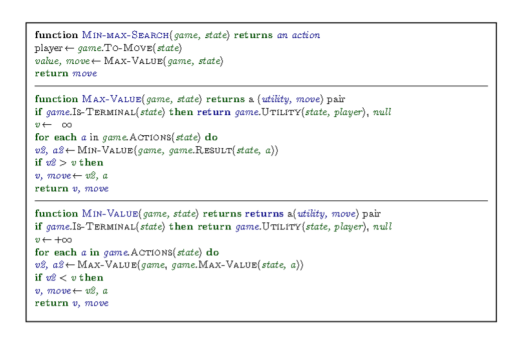

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'Minimax_Algorithm.png'
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:

from player import Player
from board import Board

# Represents a brute-force minimax agent
class MinimaxPlayer(Player):

    def __init__(self, number):
        self.number = number
        self.mark = "X" if number == 1 else "O"
        self.opponent_mark = "O" if number == 1 else "X"

    # Gets the next move given the current board state (includes the substance of Min_Max_Search function of pseudocode)
    def get_next_move(self, board: Board) -> int:
        player = self.mark  # Current player to move
        value, move = self.MaxValue(board, player)
        return move

    def MaxValue(self, board: Board, player: str) -> (int, int):
        if self.is_terminal(board):
            return self.get_score(board, player), None
        v = float('-inf')
        move = None
        for action in board.get_open_spaces():
            result_board = self.result(board, action, player)
            v2, a2 = self.MinValue(result_board, player)  # Recursive call to MinValue
            if v2 > v:
                v, move = v2, action
        return v, move

    def MinValue(self, board: Board, player: str) -> (int, int):
        if self.is_terminal(board):
            return self.get_score(board, player), None
        v = float('inf')
        move = None
        for action in board.get_open_spaces():
            result_board = self.result(board, action, player)
            v2, a2 = self.MaxValue(result_board, player)  # Recursive call to MaxValue
            if v2 < v:
                v, move = v2, action
        return v, move

    def is_terminal(self, board: Board) -> bool:
        return board.is_full() or board.has_win("X") or board.has_win("O")

    def result(self, board: Board, action: int, player: str) -> Board:
        new_board = board.copy()
        new_board.mark_space(action, player)
        return new_board

    def get_score(self, board: Board, player: str) -> int:
        if board.has_win(player):
            return 1
        elif board.has_win(self.opponent_mark):
            return -1
        else:
            return 0


Can you see a difference in the code? I cannot, so I am mystified why the AI seems to work, yet performs so poorly: Against a Random player, it loses 57%, wins 39% and draws 4%. Against my Goal-based and Utility agents, it loses 100% of the time. Upon closer inspection and testing, the algorithm seems to be playing each location in order, skipping occupied squares. It doesn't deviate from this strategy. Perhaps it is playing the same sequence of moves in order, due to the order in which actions are evaluated. Since the algorithm explores actions in the order they are returned by board.get_open_spaces(), it may be consistently choosing the first action that leads to a win (or a draw) without considering later actions that might lead to a better win. It then gets beat by superior logic in the middle of the tree? I can't figure out what I'm doing wrong. Perhaps the terminal states are not propagating up through the recursion, but then it wouldn't work at all? This is the only thing I can think of, but the code seems to be working. This is a case where I would need a Senior Developer to look at my code. :( I finished the project sadly on this note, stumped.

Thank you for a great class!

Andrew